# Machine Learning

In [1]:
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

In [2]:
df = pd.read_csv('https://dev.io-academy.uk/resources/cc-fraud-data/test')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
train_df = pd.read_csv('fraudTrain.csv')
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_df = pd.read_csv('fraudTest.csv')
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Class imbalance

In [5]:
train_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [11]:
train_df['gender']

0          F
1          F
2          M
3          M
4          M
          ..
1296670    M
1296671    M
1296672    M
1296673    M
1296674    M
Name: gender, Length: 1296675, dtype: object

## Feature engineering

In [7]:
pd.to_datetime(train_df['dob'])

0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1296670   1961-11-24
1296671   1979-12-11
1296672   1967-08-30
1296673   1980-08-18
1296674   1995-08-16
Name: dob, Length: 1296675, dtype: datetime64[ns]

In [10]:
pd.get_dummies(train_df['gender'])

,F,M
0,True,False
1,True,False
2,False,True
3,False,True
4,False,True
...,...,...
1296670,False,True
1296671,False,True
1296672,False,True
1296673,False,True


In [12]:
train_df['age'] = dt.date.today().year - pd.to_datetime(train_df['dob']).dt.year
train_df['hour'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
train_df['day'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.dayofweek
train_df['month'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.month
train = train_df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]

train = pd.get_dummies(train, drop_first=True)

y_train = train['is_fraud'].values
X_train = train.drop("is_fraud", axis='columns').values

In [13]:
# let's do the same to the testing dataset
test_df['age'] = dt.date.today().year-pd.to_datetime(test_df['dob']).dt.year
test_df['hour'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.hour
test_df['day'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.dayofweek
test_df['month'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.month
test = test_df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
test = pd.get_dummies(test, drop_first=True)
y_test = test['is_fraud'].values
X_test = test.drop("is_fraud", axis='columns').values

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.12      0.72      0.20      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.85      0.59    555719
weighted avg       1.00      0.98      0.99    555719

Confusion matrix:
 [[541812  11762]
 [   594   1551]]
Share of Non-Fraud in Test Data: 0.9961


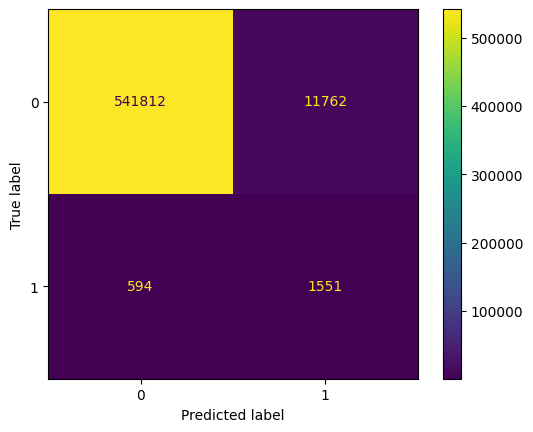

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression(class_weight={0:1, 1:100})
model.fit(X_train, y_train)
predicted = model.predict(X_test)

print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.02      0.00      0.01      2145

    accuracy                           1.00    555719
   macro avg       0.51      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion matrix:
 [[553329    245]
 [  2139      6]]
Share of Non-Fraud in Test Data: 0.9961


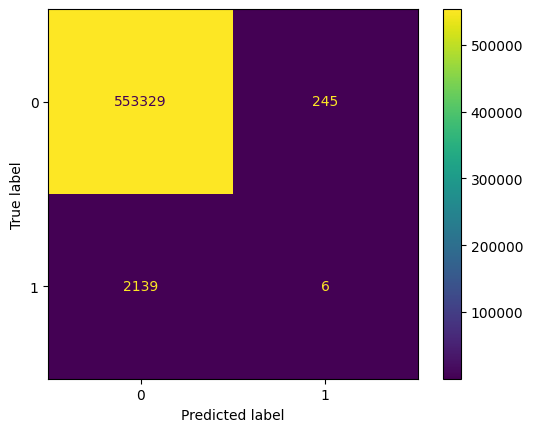

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [20]:
xgb_model = xgb.XGBClassifier(class_weight={0:1, 1:10})

xgb_model.fit(X_train, y_train)
predicted = xgb_model.predict(X_test)

print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

[16:44:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.94      0.72      0.81      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.86      0.91    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[553475     99]
 [   603   1542]]
Share of Non-Fraud in Test Data: 0.9961
